<a href="https://colab.research.google.com/github/sizanesd/Data-Analysis/blob/master/Copy_of_Snippets_Importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
data = pd.read_csv('Inca_Tribe_House_Prices.csv')


In [ ]:
data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Chalet,70000,2.0,2.0,10.0,Yes,Unknown,Fanar De Luna,Cash,Ready to move,Finished,Ain Sukhna
1,Apartment,1500000,3.0,3.0,10.0,No,4,Unknown,Unknown Payment,Ready to move,Unknown,New Hut - El Tagamoa
2,Stand Alone Villa,29000000,5.0,6.0,11.0,No,Unknown,Mivida,Cash,Ready to move,Core & Shell,New Hut - El Tagamoa
3,Chalet,3000000,2.0,2.0,12.0,No,Ground,Marina 5,Cash,Ready to move,Finished,North Coast
4,Apartment,1128000,3.0,2.0,14.0,No,3,Beit Al Watan,Installment,soon,Unknown,New Hut - El Tagamoa


In [ ]:
# Describe data
def describe_data(data):
    print("Data Description:")
    print(data.info())
    print("\nStatistical Summary:")
    print(data.describe(include='all'))

In [ ]:
describe_data(data)

Data Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27322 entries, 0 to 27321
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27322 non-null  object 
 1   Price           27322 non-null  int64  
 2   Bedrooms        27119 non-null  float64
 3   Bathrooms       27151 non-null  float64
 4   Area            26851 non-null  float64
 5   Furnished       27322 non-null  object 
 6   Level           27322 non-null  object 
 7   Compound        27322 non-null  object 
 8   Payment_Option  27322 non-null  object 
 9   Delivery_Date   27322 non-null  object 
 10  Delivery_Term   27322 non-null  object 
 11  City            27322 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.5+ MB
None

Statistical Summary:
             Type         Price      Bedrooms     Bathrooms          Area  \
count       27322  2.732200e+04  27119.000000  27151.000000  26851.000000   


In [ ]:
print(data['Type'].value_counts())

Type
Apartment            8506
Chalet               6593
Stand Alone Villa    4629
Town House           3073
Twin House           1793
Duplex                861
Standalone Villa      608
Penthouse             526
Twin house            483
Studio                250
Name: count, dtype: int64


In [ ]:
print(data['Type'].value_counts())

In [ ]:
print(data['Price'].describe())

count    2.732200e+04
mean     4.761822e+06
std      6.766653e+06
min      3.000000e+04
25%      1.150000e+06
50%      2.731000e+06
75%      5.989000e+06
max      2.400000e+08
Name: Price, dtype: float64


In [ ]:
def summarize_nulls(data):
    null_counts = data.isnull().sum()
    null_percentages = (null_counts / len(data)) * 100
    null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})
    print(null_summary[null_summary['Null Count'] > 0])

In [ ]:
#Visualize Null Values
#A heatmap can help you visualize the distribution of null values:

def visualize_nulls(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Null Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

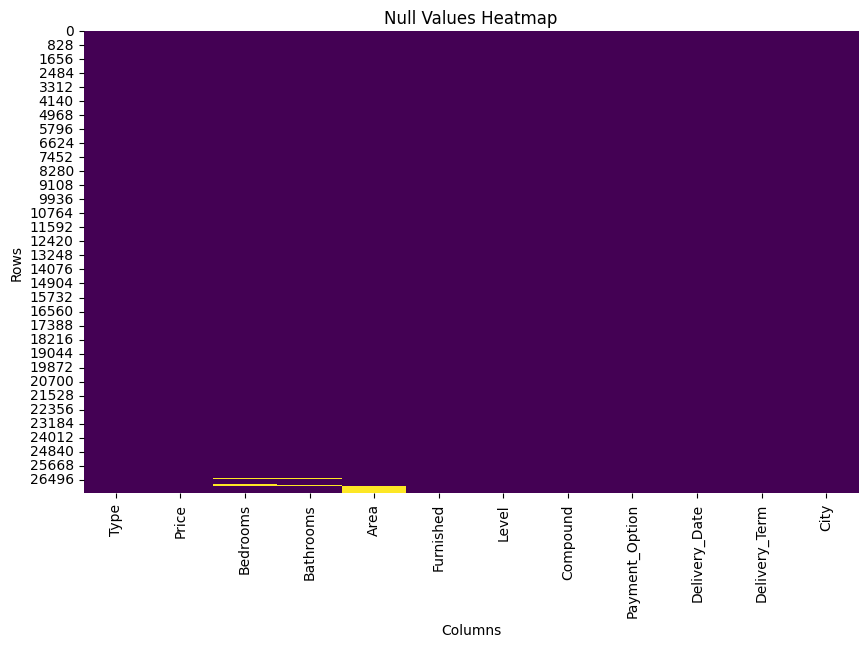

In [ ]:
visualize_nulls(data)

In [ ]:
def summarize_nulls(data):
    null_counts = data.isnull().sum()  # Count null values
    null_percentages = (null_counts / len(data)) * 100  # Calculate percentage
    null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

    # Display only columns with null values
    print(null_summary[null_summary['Null Count'] > 0])

In [ ]:
summarize_nulls(data)

           Null Count  Null Percentage
Bedrooms          203         0.742991
Bathrooms         171         0.625869
Area              471         1.723886


In [ ]:
# Function to impute null values with median
def handle_missing_values(data, columns):
    for column in columns:
        if column in data.columns:
            median_value = data[column].median()  # Calculate median
            data[column].fillna(median_value, inplace=True)  # Fill nulls with median
            print(f"Filled nulls in '{column}' with median value: {median_value}")
    return data

In [ ]:
# Specify the columns to impute
columns_to_impute = ['Bedrooms', 'Bathrooms', 'Area']

In [ ]:
# Apply the function
data = handle_missing_values(data, columns_to_impute)

Filled nulls in 'Bedrooms' with median value: 3.0
Filled nulls in 'Bathrooms' with median value: 3.0
Filled nulls in 'Area' with median value: 175.0


<ipython-input-23-97e4c5b227b7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median_value, inplace=True)  # Fill nulls with median


In [ ]:
# Display the updated DataFrame
print(data)

                    Type      Price  Bedrooms  Bathrooms   Area Furnished  \
0                 Chalet      70000       2.0        2.0   10.0       Yes   
1              Apartment    1500000       3.0        3.0   10.0        No   
2      Stand Alone Villa   29000000       5.0        6.0   11.0        No   
3                 Chalet    3000000       2.0        2.0   12.0        No   
4              Apartment    1128000       3.0        2.0   14.0        No   
...                  ...        ...       ...        ...    ...       ...   
27317  Stand Alone Villa   65000000       3.0        3.0  175.0        No   
27318  Stand Alone Villa   65000000       3.0        3.0  175.0        No   
27319  Stand Alone Villa   69000000       3.0        3.0  175.0        No   
27320  Stand Alone Villa   90000000       3.0        3.0  175.0        No   
27321  Stand Alone Villa  100000000       3.0        3.0  175.0       Yes   

         Level             Compound       Payment_Option  Delivery_Date  \
